In [39]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import SGD
import pickle as pkl

# Data Cleaning

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data.drop(["Unnamed: 0","Clothing ID","Age","Division Name","Department Name","Class Name","Review Text"],axis = 1, inplace = True)
data.head()

,Title,Rating,Recommended IND,Positive Feedback Count
0,NaN,4,1,0
1,NaN,5,1,4
2,Some major design flaws,3,0,0
3,My favorite buy!,5,1,0
4,Flattering shirt,5,1,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    19676 non-null  object
 1   Rating                   23486 non-null  int64 
 2   Recommended IND          23486 non-null  int64 
 3   Positive Feedback Count  23486 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 734.1+ KB


In [5]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19676 entries, 2 to 23485
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    19676 non-null  object
 1   Rating                   19676 non-null  int64 
 2   Recommended IND          19676 non-null  int64 
 3   Positive Feedback Count  19676 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 768.6+ KB


In [6]:
data.reset_index(inplace = True)

In [7]:
data

,index,Title,Rating,Recommended IND,Positive Feedback Count
0,2,Some major design flaws,3,0,0
1,3,My favorite buy!,5,1,0
2,4,Flattering shirt,5,1,6
3,5,Not for the very petite,2,0,4
4,6,Cagrcoal shimmer fun,5,1,1
...,...,...,...,...,...
19671,23481,Great dress for many occasions,5,1,0
19672,23482,Wish it was made of cotton,3,1,0
19673,23483,"Cute, but see through",3,0,1
19674,23484,"Very cute dress, perfect for summer parties an...",3,1,2


In [8]:
data.drop("index", axis = 1, inplace= True)

In [9]:
data.head()

,Title,Rating,Recommended IND,Positive Feedback Count
0,Some major design flaws,3,0,0
1,My favorite buy!,5,1,0
2,Flattering shirt,5,1,6
3,Not for the very petite,2,0,4
4,Cagrcoal shimmer fun,5,1,1


# Data conversion

In [10]:
reviews = data['Title']

In [11]:
reviews

0                                  Some major design flaws
1                                         My favorite buy!
2                                         Flattering shirt
3                                  Not for the very petite
4                                     Cagrcoal shimmer fun
                               ...                        
19671                       Great dress for many occasions
19672                           Wish it was made of cotton
19673                                Cute, but see through
19674    Very cute dress, perfect for summer parties an...
19675                      Please make more like this one!
Name: Title, Length: 19676, dtype: object

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
word1 = []
for i in reviews:
    words = nltk.word_tokenize(i)
    words = [lemmatizer.lemmatize(word) for word in words if word not in (set(stopwords.words('english')) and [".", ",", "!", "-"])]
#words = [word for word in words not in ['0','1','2','3','4','5','6','7','8','9']]
    words = ' '.join(words)
    word1.append(words)

In [16]:
print(word1)

['Some major design flaw', 'My favorite buy', 'Flattering shirt', 'Not for the very petite', 'Cagrcoal shimmer fun', 'Shimmer surprisingly go with lot', 'Flattering', 'Such a fun dress', "Dress look like it 's made of cheap material", 'Perfect', 'Runs big', 'Pretty party dress with some issue', 'Nice but not for my body', 'You need to be at least average height or taller', 'Looks great with white pant', 'Super cute and cozy', 'Stylish and comfortable', 'Cute crisp shirt', "I 'm torn", 'Not what it look like', "Like it but do n't love it", 'Versatile', 'Falls flat', 'Huge disappointment', 'Loved but returned', 'Great shirt', 'Great layering piece', 'Cuter in oerson', 'Love these pant', 'Mehh', 'Love this dress', 'Lovely', 'Beautifully cut lightweight coat', 'Soft & lovely', 'Some thing you should know ...', 'Beautiful', 'Love the two tone design', 'Love the color', 'Love the embroidery', 'Cute for fall', 'Love', 'Flattering and comfortable', 'Cute top', 'Soft and cute a can be', 'Boring

## Applying bag of words

In [18]:
cv = CountVectorizer()
X = cv.fit_transform(word1).toarray()

In [40]:
# Saving the cv model (Bag of words)
#pkl.dump(cv,open("BoW_Title.pkl","wb"))

In [19]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#just saving the x data in a pickle file for future use
#pkl.dump(X,open("titledata.pkl","wb"))

In [32]:
y = data["Recommended IND"]
y

0        0
1        1
2        1
3        0
4        1
        ..
19671    1
19672    1
19673    0
19674    1
19675    1
Name: Recommended IND, Length: 19676, dtype: int64

## Splitting the data

In [33]:
xtrain = X.iloc[1000:,:]
xtest = X.iloc[0:1000,:]
ytrain = y.iloc[1000:]
ytest = y.iloc[0:1000]
#Converting into numpy array
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

# Creating our Ann model

In [ ]:
#creating our ann model for predictions 

model = Sequential()
model.add(Dense(128,activation = 'relu',input_shape = (len(xtrain[0]),) ))
model.add(Dropout(0.5))
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer ='Adam')

hist = model.fit(xtrain,ytrain , epochs = 20, verbose = 2, batch_size = 25)

model.save("reviewstar.h5",hist)

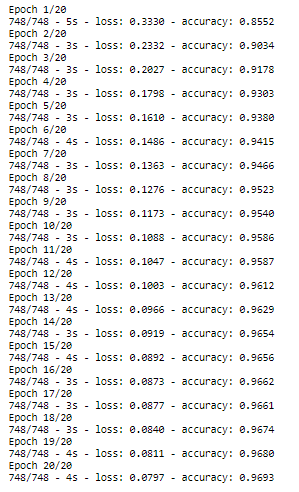